# Project: Pulsar Stars Classification

## Introduction

Pulsars are highly magnetised rotating neutron stars. They emit regular pulses of radio waves from their magnetic poles. These pulses produce a periodically repeating detectable pattern of broadband radio emission that varies with each rotation. Individual pulsars are unique in their emission patterns.
Radio waves from pulsars, observed through large radio telescopes, are used by astronomers to estimate the distances of cosmic objects. Possible signal detections, candidates, are averaged over many rotations before classifying them. Radio Frequency Interference (RFI) and noise are behind most detections, making identifying pulsars difficult. 
The predictive question we aim to answer through this project is: Can we predict the class of our unclassified pulsar star dataset using the four integrated profiles?

University of Manchester’s Pulsar Star dataset will be used. The pulsar candidates in this dataset were collected during the High Time Resolution Universe Survey. 
Each row represents a pulsar candidate. Eight continuous variables (mean, standard deviation, excess kurtosis and skewness of both the integrated pulse profile and the DM-SNR curve) and one class variable describes each candidate. The class label, represented in the last column, has a value of 1 for a real pulsar and 0 otherwise. 
The sum of many individual pulsar star pulses, the pulsar’s fingerprint, is the integrated pulse profile. The background radio waves that may interfere with the desired signal is the DM-SNR (Dispersion Measure Signal-to-Noise Ratio) curve. 

In [1]:
install.packages("tidyverse")
install.packages("tidymodels")
install.packages("themis")
install.packages("cowplot")
install.packages("ISLR")
install.packages("repr")
install.packages("GGally")
install.packages("themis")

also installing the dependencies ‘lifecycle’, ‘tidyselect’, ‘vctrs’, ‘timechange’, ‘systemfonts’, ‘textshaping’, ‘vroom’, ‘broom’, ‘conflicted’, ‘cli’, ‘dbplyr’, ‘dplyr’, ‘dtplyr’, ‘forcats’, ‘ggplot2’, ‘googlesheets4’, ‘haven’, ‘hms’, ‘httr’, ‘jsonlite’, ‘lubridate’, ‘modelr’, ‘pillar’, ‘purrr’, ‘ragg’, ‘readr’, ‘readxl’, ‘reprex’, ‘rlang’, ‘rstudioapi’, ‘rvest’, ‘stringr’, ‘tibble’, ‘tidyr’


Warning message in install.packages("tidyverse"):
“installation of package ‘systemfonts’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘ragg’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘tidyverse’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' 

In [2]:
set.seed(1)

library(tidyverse)
library(tidymodels)
library(repr)
library(cowplot)
library(GGally)
library(ISLR)
library(themis)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

ERROR: Error in library(themis): there is no package called ‘themis’


## Reading, Cleaning, Wrangling Data

The first step is to read the file from the web into Jupyter using the read_csv function. The raw dataset has eight numeric variables and one categorical variable, all of the double data type and without column names. We tidied the data by assigning the given names to the columns and changing the categorical variable from double to factor data type. 

In [3]:
# DOWNLOADING THE FILE FROM THE WEB, THIS FILE DOES NOT CONTAIN COLUMN NAMES 
temp <- tempfile()
download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip", temp)
pulsar_file <- unz(temp, "HTRU_2.csv")
pulsar <- read_csv(pulsar_file, col_names = FALSE)

# WE ARE ASSIGNING COLUMN NAMES ACCORDING TO THE INFORMATION THAT HAS BEEN GIVEN TO US
colnames(pulsar) <- c("mean_ip", "std_ip", "kurt_ip", "skew_ip", "mean_dm_snr", "std_dm_snr", "kurt_dm_snr", "skew_dm_snr", "class")

# WE ARE CHANGING CLASS TO A FACTOR VARIABLE BECAUSE THAT IS THE CATEGORICAL VARIABLE THAT WE ARE TRYING TO PREDICT FOR 
pulsar_mutate <- pulsar %>%
                mutate(class = as_factor(class))

print("Table 1: Tidy pulsar dataset.")
pulsar_mutate

Rows: 17898 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): X1, X2, X3, X4, X5, X6, X7, X8, X9

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Table 1: Tidy pulsar dataset."


mean_ip   std_ip   kurt_ip      skew_ip     mean_dm_snr std_dm_snr
1     140.56250 55.68378 -0.234571412 -0.69964840  3.1998328  19.110426 
2     102.50781 58.88243  0.465318154 -0.51508791  1.6772575  14.860146 
3     103.01562 39.34165  0.323328365  1.05116443  3.1212375  21.744669 
4     136.75000 57.17845 -0.068414638 -0.63623837  3.6429766  20.959280 
5      88.72656 40.67223  0.600866079  1.12349169  1.1789298  11.468720 
6      93.57031 46.69811  0.531904850  0.41672112  1.6362876  14.545074 
7     119.48438 48.76506  0.031460220 -0.11216757  0.9991639   9.279612 
8     130.38281 39.84406 -0.158322759  0.38954045  1.2207358  14.378941 
9     107.25000 52.62708  0.452688025  0.17034738  2.3319398  14.486853 
10    107.25781 39.49649  0.465881961  1.16287712  4.0794314  24.980418 
11    142.07812 45.28807 -0.320328426  0.28395251  5.3762542  29.009897 
12    133.25781 44.05824 -0.081059862  0.11536151  1.6321070  12.007806 
13    134.96094 49.55433 -0.135303833 -0.08046960 10.6964883  41.342044 
14    117.94531 45.50658  0.325437564  0.66145946  2.8361204  23.118350 
15    138.17969 51.52448 -0.031852329  0.04679717  6.3302676  31.576347 
16    114.36719 51.94572 -0.094498904 -0.28798409  2.7382943  17.191891 
17    109.64062 49.01765  0.137635830 -0.25669978  1.5083612  12.072901 
18    100.85156 51.74352  0.393836792 -0.01124074  2.8411371  21.635778 
19    136.09375 51.69100 -0.045908926 -0.27181639  9.3428094  38.096400 
20     99.36719 41.57220  1.547196967  4.15410604 27.5551839  61.719016 
21    100.89062 51.89039  0.627486528 -0.02649780  3.8837793  23.045267 
22    105.44531 41.13997  0.142653801  0.32041968  3.5518395  20.755017 
23     95.86719 42.05992  0.326386917  0.80350179  1.8327759  12.248969 
24    117.36719 53.90861  0.257953441 -0.40504908  6.0183946  24.766123 
25    106.64844 56.36718  0.378355072 -0.26637161  2.4364549  18.405371 
26    112.71875 50.30127  0.279390953 -0.12901071  8.2817726  37.810012 
27    130.85156 52.43286  0.142596727  0.01888544  2.6463211  15.654436 
28    119.43750 52.87482 -0.002549267 -0.46036029  2.3653846  16.498032 
29    123.21094 51.07801  0.179376819 -0.17728516  2.1070234  16.921773 
30    102.61719 49.69235  0.230438984  0.19332537  1.4891304  16.004411 
⋮     ⋮         ⋮        ⋮            ⋮           ⋮           ⋮         
17869  96.85938 49.82277  0.276811333 -0.33182398   1.7441472 14.764022 
17870 137.37500 50.76278  0.085075173 -0.09267941   7.5610368 33.471080 
17871 110.76562 55.34219  0.066099851 -0.50041490  14.3795987 45.320742 
17872 119.00781 52.09104  0.215293531 -0.02022867   2.0125418 18.754594 
17873 139.89844 44.28103 -0.044618449  0.10084109   1.1396321 11.196096 
17874  89.45312 35.84883  0.731655618  3.10147356   1.4506689 14.204964 
17875 126.55469 54.27589  0.207825362 -0.19168640   2.2943144 17.429850 
17876 133.14062 43.70618 -0.012686084  0.23239435   2.0919732 13.489370 
17877 111.76562 52.94359  0.671723986  0.38359393 149.8436455 97.926948 
17878 118.29688 49.93282  0.144400986 -0.26927317   1.0418060 10.199265 
17879  90.14844 40.78604  0.457138562  0.88551621   5.3545150 29.759511 
17880 107.66406 44.46246  0.296045688  0.22776530   6.2909699 33.512873 
17881 105.49219 43.50072  0.154180228  0.40811660   2.3160535 19.098507 
17882 130.50000 46.14955  0.084445004 -0.10735478   1.5292642 11.757086 
17883 131.00000 55.93579 -0.023598123 -0.53665128   1.1596990 10.856794 
17884  84.42188 41.77556  0.757467101  1.10707476   1.3361204 12.026757 
17885 106.87500 47.57133  0.199440015  0.28496422   3.0794314 20.984455 
17886 133.82031 43.47816  0.136691092  0.35312123   0.9824415  9.486068 
17887 127.07031 47.66356  0.006552426 -0.12363370   0.8536789 11.197206 
17888 121.37500 53.24516  0.103772205 -0.36511875   1.0953177 12.239976 
17889  98.72656 50.40782  0.565123614  0.24523085   0.5702341  9.011285 
17890 126.62500 55.72183  0.002946216 -0.30321814   0.5342809  8.588882 
17891 143.67188 45.30265 -0.045768538  0.35364267   5.1739130 26

## Summary of Data
1. To determine if scaling is needed, a table with all the mean values is coded for. The mean of the potential predictor variables vary by more than 10 fold so the predictor variables have been scaled. 
2. The data has been split into training and testing sets. To ensure that each class is proportionally represented in each set, the data has been stratified by class. 
3. The ggpairs() function has been used to visualize the correlation between the eight potential predictor variables and the target variable. From the visualization of kurt_ip and mean_dm_snr, a clear distinction can be seen between class 0 and class 1, non-pulsars and pulsars. Additionally, the scatterplot of kurt_ip and mean_dm_snr shows a distinct divide between the region of non-pulsar signals and the region of pulsar signals. The kurt_ip distribution for non-pulsars is easily differentiable from the kurt_ip distribution for pulsars. This leads to the inference that kurt_ip and mean_dm_snr are two variables that play a large role in classifying a new single observation, and have therefore been chosen as the predictor variables for the classification model. 
4. The group_by() and summarize() functions are used to calculate the count of each class. This helps us estimate the proportion of each class in the training set. The ratio of pulsars to non-pulsars is 12200:1223, indicating a severe imbalance. Therefore, the data needs to be upsampled or downsampled for an accurate classification. 

In [4]:
# 1: AVERAGE OF EACH COLUMN IS CALCULATED SO THAT WE CAN DETERMINE IF SCALING IS NECESSARY FOR OUR MODEL 
pulsar_with_column_means <- pulsar |>
                select(mean_ip:skew_dm_snr) |>
                map_df(mean)

print("Table 2: Average of each variable from the pulsar dataset.")
pulsar_with_column_means

[1] "Table 2: Average of each variable from the pulsar dataset."


mean_ip std_ip   kurt_ip   skew_ip  mean_dm_snr std_dm_snr kurt_dm_snr
1 111.08  46.54953 0.4778573 1.770279 12.6144     26.32651   8.303556   
  skew_dm_snr
1 104.8577

In [5]:
# 2: SPLITTING OUR DATA INTO TRAINING AND TESTING SETS 
pulsar_split <- initial_split(pulsar_mutate, prop = 0.75, strata = class)
pulsar_train_split <- training(pulsar_split) 
pulsar_test_split <- testing(pulsar_split)

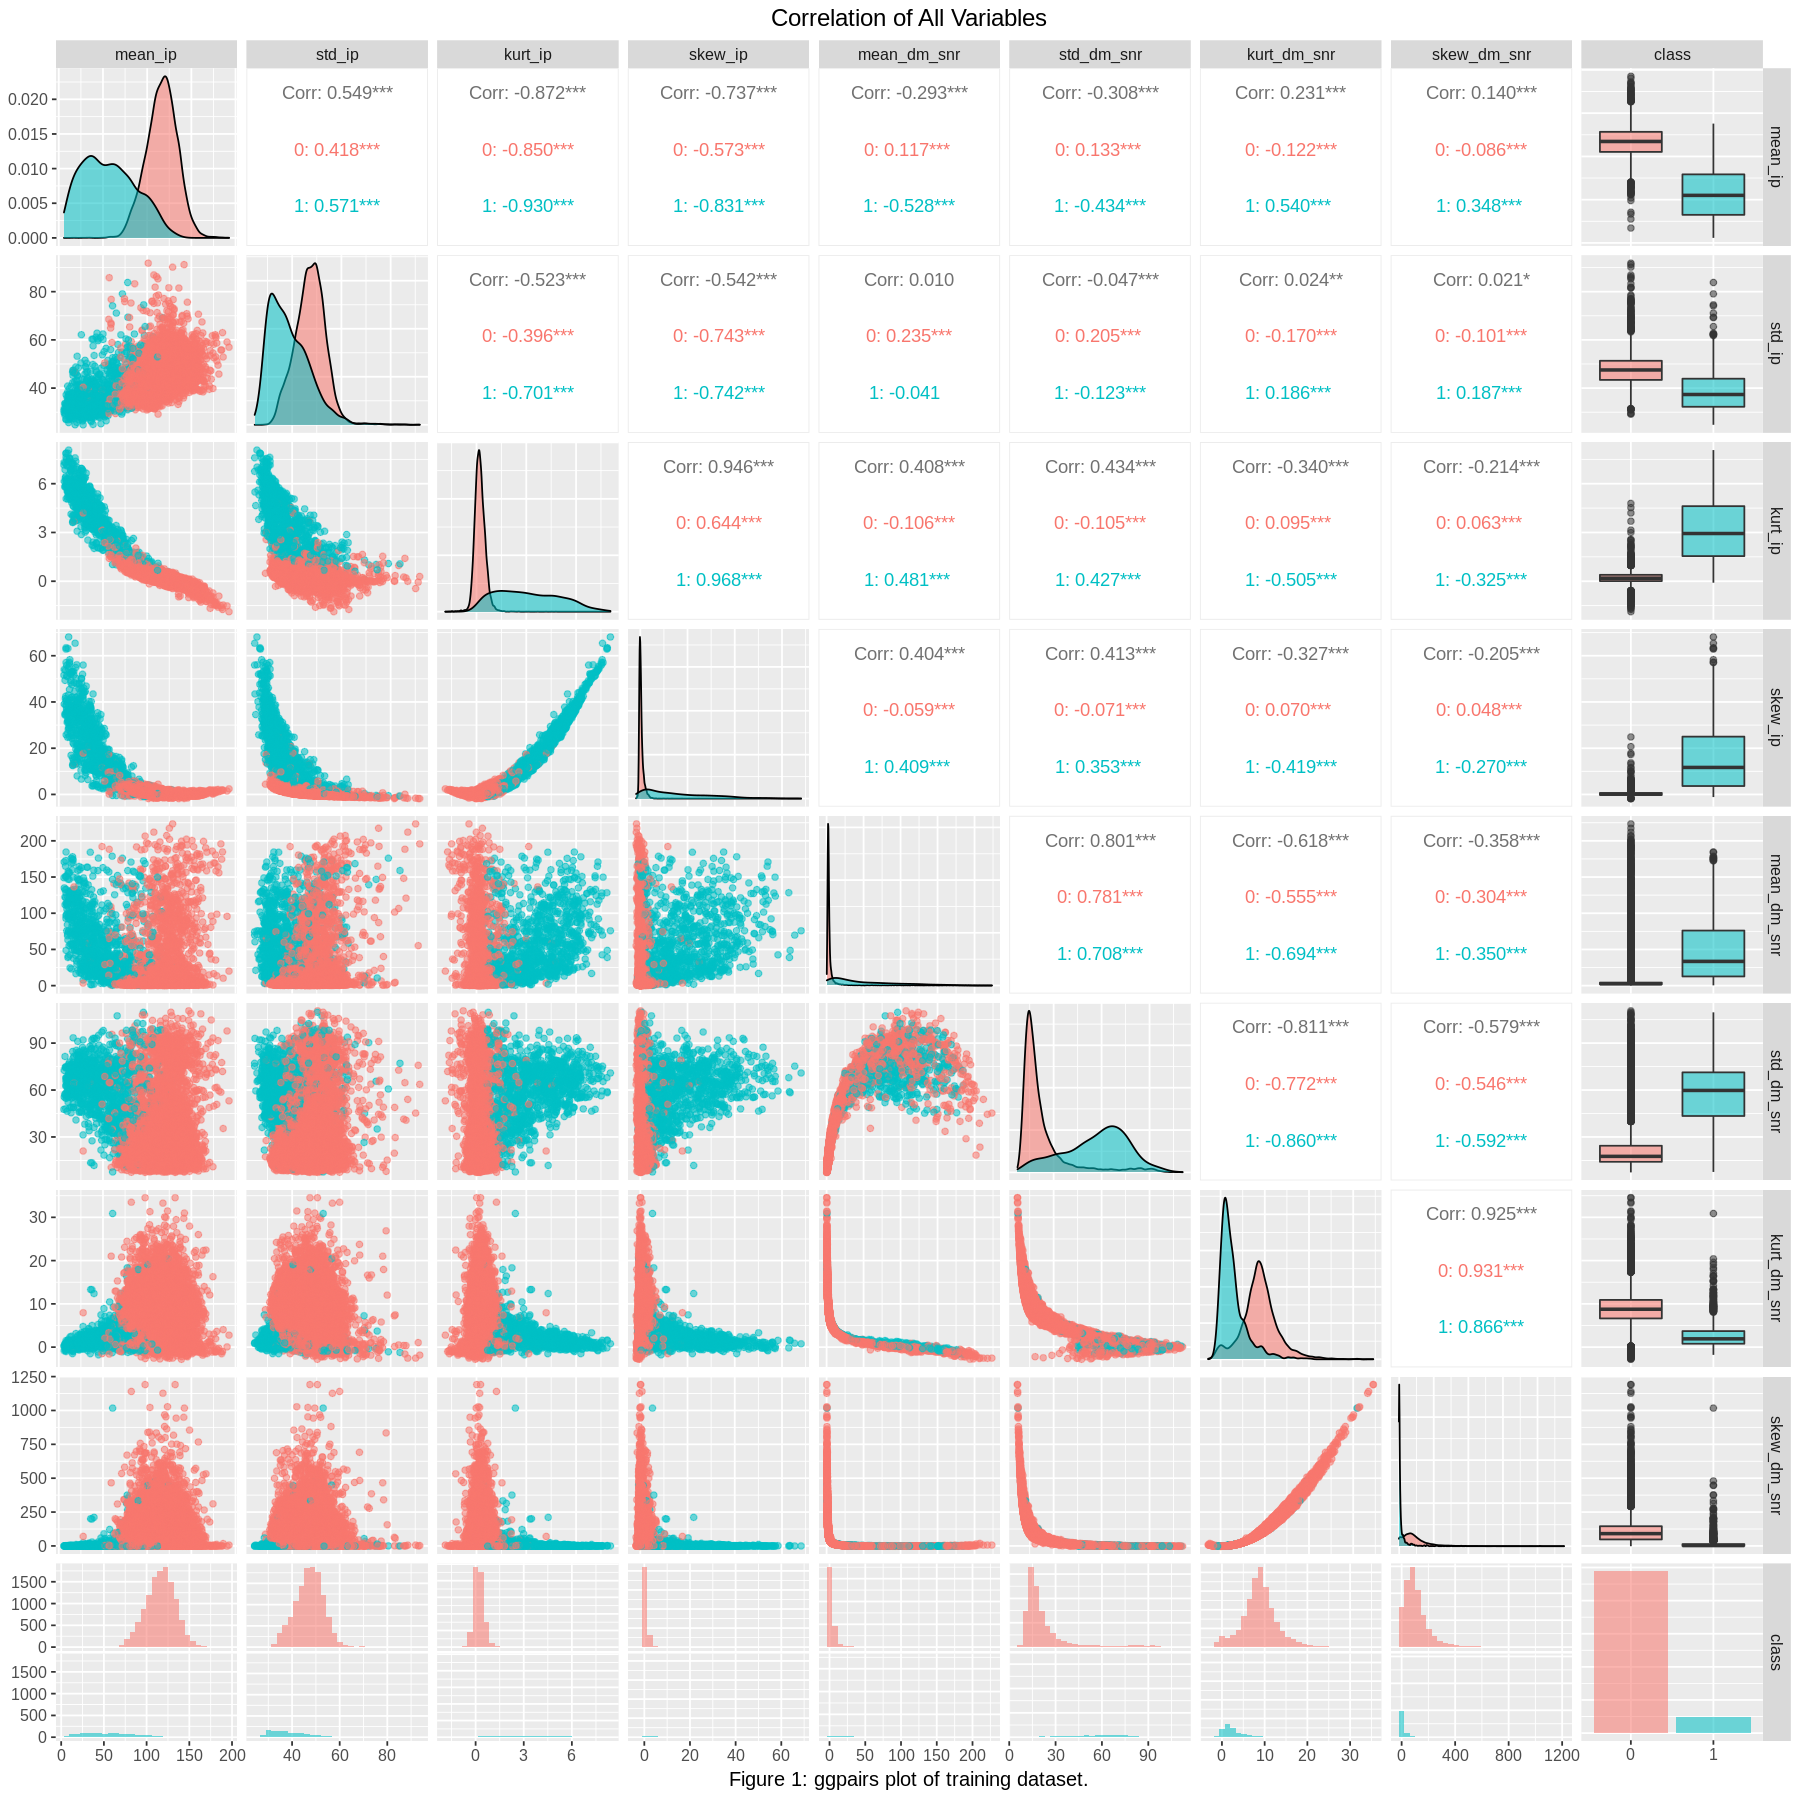

In [6]:
# 3: TO DETERMINE WHICH PREDICTOR VARIABLES APPEAR TO DIFFER THE MOST BETWEEN THE TWO CLASSES, USE GGPAIRS()
options(repr.plot.height = 15, repr.plot.width = 15)

correlation <- ggpairs(pulsar_train_split, mapping = aes(color = class, alpha = 0.5), lower=list(combo=wrap("facethist", bins = 30))) +
    labs(caption = "Figure 1: ggpairs plot of training dataset.") +
    ggtitle("Correlation of All Variables") +
    theme(text = element_text(size = 12),
          plot.title = element_text(hjust = 0.5),
          plot.caption = element_text(hjust = 0.5, size = 12))

correlation

In [7]:
# 4: PULSAR OBSERVATION COUNTS FOR EACH CLASS 
count_pulsar_train_split <- pulsar_train_split |>
    group_by(class) |>
    summarize(n = n())

print("Table 3: Class count of pulsar dataset.")
count_pulsar_train_split
# AS THE CLASS IS VERY IMBALANCED, WE WILL HAVE TO FIRST BALANCE OUR CLASSES


[1] "Table 3: Class count of pulsar dataset."


class n    
1 0     12200
2 1      1223

## Recipes

Our chosen predictor variables, kurt_ip and mean_dem_snr have been used in the recipe for the factor variable class. The training data set is downsampled based on the variable class for the recipe. For downsampling, the under_ratio is set to 1 to cut down the data points in class 0 and fix the imbalance. Downsampling is chosen rather than upsampling because the resulting training set is smaller in the case of downsampling (2446 data points for downsampling as compared to 24400 data points for upsampling), allowing for a shorter code run time. After the initial analysis, the need to scale and center out data was identified. All predictors of the dataset have been scaled and centered in the recipe using the step_scale and step_center functions. 

In [8]:
# WE WILL ONLY ACCOUNT FOR KURT_IP AND MEAN_DM_SNR VARIABLES 
# WE WILL HAVE TO USE STEP_DOWNSAMPLE IN OUR RECIPE TO BALANCE OUR CLASSES

pulsar_recipe <- recipe(class ~ kurt_ip + mean_dm_snr, data = pulsar_train_split) |>
  step_downsample(class, under_ratio = 1, skip = TRUE) |>  
  step_scale(all_predictors()) |>
  step_center(all_predictors())

downsampled_pulsar_train_split <- recipe(class ~ kurt_ip + mean_dm_snr, data = pulsar_train_split) |>
  step_downsample(class, under_ratio = 1, skip = FALSE) |>
    prep() |>
    bake(pulsar_train_split)

print("Table 4: Downsampled pulsar dataset with kurt_ip, mean_dm_snr, and class variables.")
downsampled_pulsar_train_split

# SINCE PREPERATION AND BAKING ARE REQUIRED, DOWNSAMPLED PULSAR TRAIN WILL BE USED FOR PLOTTING;
# WE DO NOT WANT SCALED DATA EITHER TO ENSURE INTERPRETABILITY OF PLOT.

[1] "Table 4: Downsampled pulsar dataset with kurt_ip, mean_dm_snr, and class variables."


kurt_ip     mean_dm_snr class
1    -0.08654116  2.471572   0    
2     0.79954996 21.605351   0    
3     0.34043056  3.663043   0    
⋮    ⋮           ⋮           ⋮    
2444 4.779124    129.8637    1    
2445 6.377273    141.8604    1    
2446 0.671724    149.8436    1

Two recipes have been coded for. This is because the unscaled downsampled data is more interpretable and therefore provides a better visualization. The prep() and bake() functions have to be used for this recipe, downsampled_pulsar_train_split. The other recipe, pulsar_recipe, contains the scaled data and will be used for the rest of our classification process. The scaled data doesn’t require the prep() and bake() functions as the workflow does this for us.

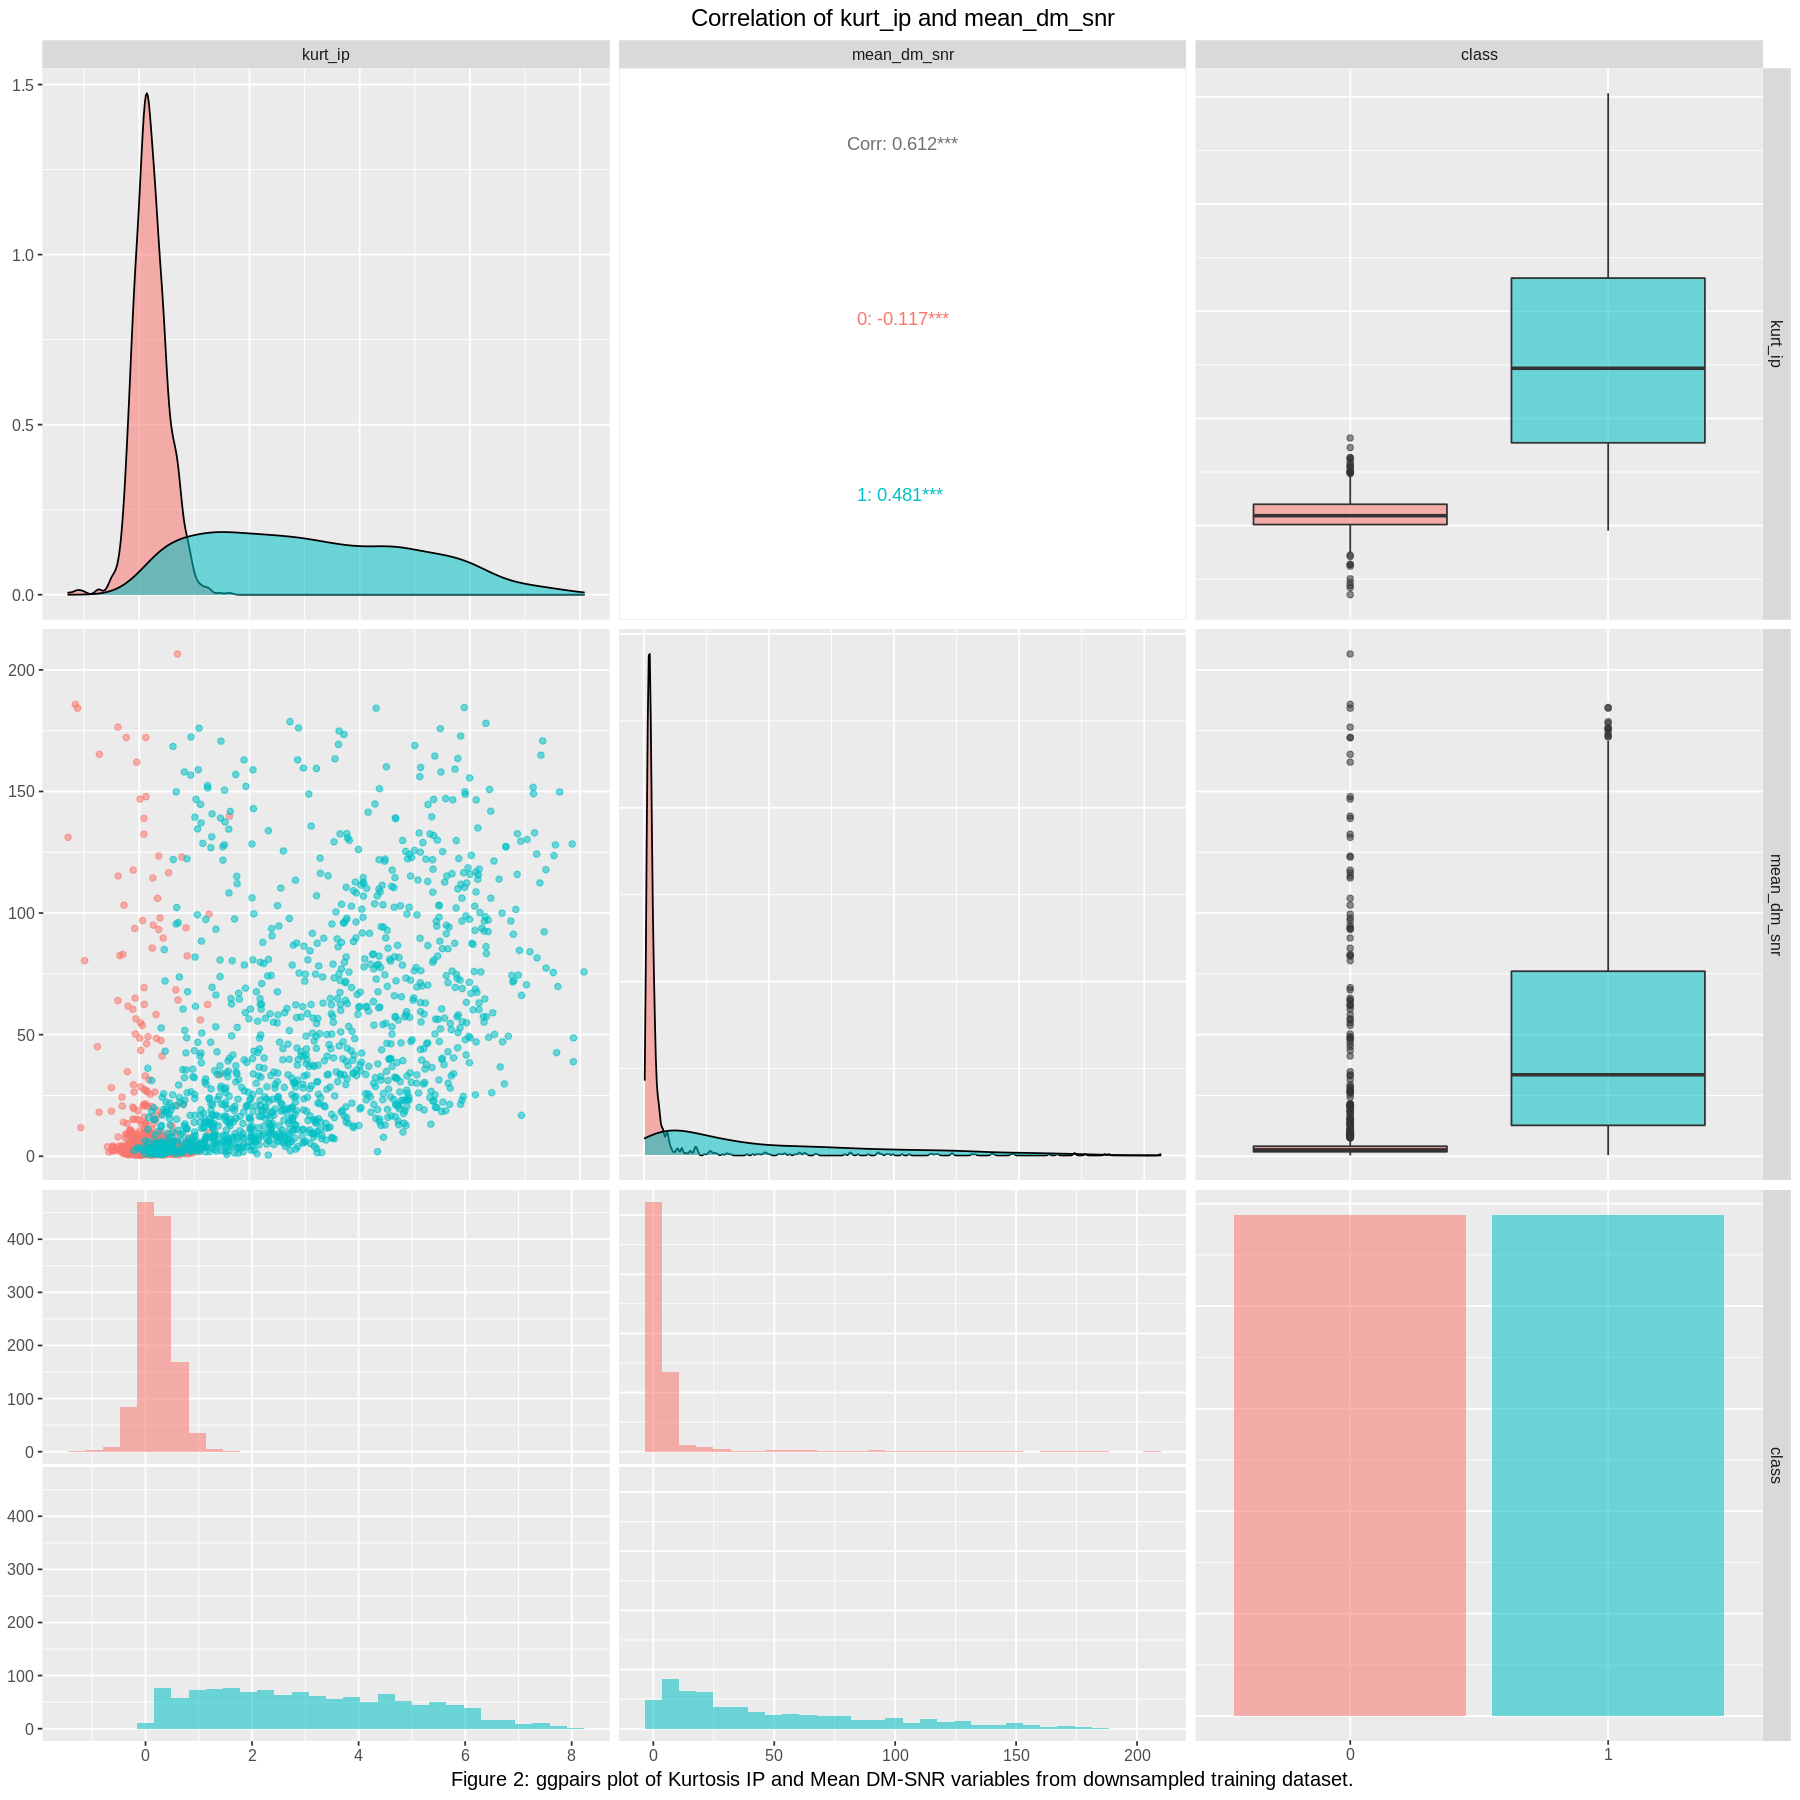

In [9]:
# A SENSE OF THE CLASS DISTRIBUTION IN OUR DOWNSAMPLED TRAINING DATA CAN BE GAINED BY ANALYZING 
# THE CORRELATION BETWEEN OUR TWO PREDICTOR VARIABLES: KURT IP AND MEAN DM SNR.
options(repr.plot.height = 15, repr.plot.width = 15)
correlation_plot <- ggpairs(downsampled_pulsar_train_split, mapping = aes(color = class, alpha = 0.5) , lower=list(combo=wrap("facethist", bins = 30))) +
    labs(caption = "Figure 2: ggpairs plot of Kurtosis IP and Mean DM-SNR variables from downsampled training dataset.") +
    ggtitle("Correlation of kurt_ip and mean_dm_snr") +
    theme(text = element_text(size = 12),
          plot.title = element_text(hjust = 0.5),
          plot.caption = element_text(hjust = 0.5, size = 12))

correlation_plot

## Determining the Optimum K

The model spec for our k-nn classification is built using the nearest_neighbors() function, with the argument neighbors = tune(). 5 fold cross validation,stratified by class, is also used to determine our optimum k. 5 was chosen to reduce the code run time. This is used later in the workflow to determine the optimum K by plotting a graph of accuracy vs K.

In [10]:
# THE MODEL TO DETERMINE K 
pulsar_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |> 
  set_engine("kknn") |>
  set_mode("classification")

# USING CROSS-VALIDATION TO HELP US DETERMINE K 
# WE WILL CHOOSE V = 5 INSTEAD OF V=10 FOR BETTER OPTIMIZATION
pulsar_vfold <- vfold_cv(pulsar_train_split, v = 5, strata = class)

A tibble containing k values from 1 to 10 with the object name k_vals is created to test for values of k between 1 and 10. 
Using the scaled, centered and downsampled pulsar_recipe, a workflow has been created for the classification. The results of the workflow have been filtered for accuracy in the .metric column. This allows us to plot accuracy vs k to determine the optimum k value. 
k=8 has been selected as our neighbor after analysing the plot because it provides a relatively high accuracy of ~96% and changing k to a nearby value will not have a large effect on the accuracy. 

[1] "Table 5: Metric results for each K value."


neighbors .metric  .estimator mean      n std_err     .config              
1  1         accuracy binary     0.9010665 5 0.005869089 Preprocessor1_Model01
2  1         roc_auc  binary     0.8992382 5 0.004313812 Preprocessor1_Model01
3  2         accuracy binary     0.9010665 5 0.005869089 Preprocessor1_Model02
⋮  ⋮         ⋮        ⋮          ⋮         ⋮ ⋮           ⋮                    
18  9        roc_auc  binary     0.9632487 5 0.004810662 Preprocessor1_Model09
19 10        accuracy binary     0.9600696 5 0.003824219 Preprocessor1_Model10
20 10        roc_auc  binary     0.9632590 5 0.004492992 Preprocessor1_Model10

[1] "Table 6: Accuracy results for each K value."


neighbors .metric  .estimator mean      n std_err     .config              
1  1         accuracy binary     0.9010665 5 0.005869089 Preprocessor1_Model01
2  2         accuracy binary     0.9010665 5 0.005869089 Preprocessor1_Model02
3  3         accuracy binary     0.9415932 5 0.003834571 Preprocessor1_Model03
⋮  ⋮         ⋮        ⋮          ⋮         ⋮ ⋮           ⋮                    
8   8        accuracy binary     0.9593990 5 0.003759576 Preprocessor1_Model08
9   9        accuracy binary     0.9600696 5 0.003824219 Preprocessor1_Model09
10 10        accuracy binary     0.9600696 5 0.003824219 Preprocessor1_Model10

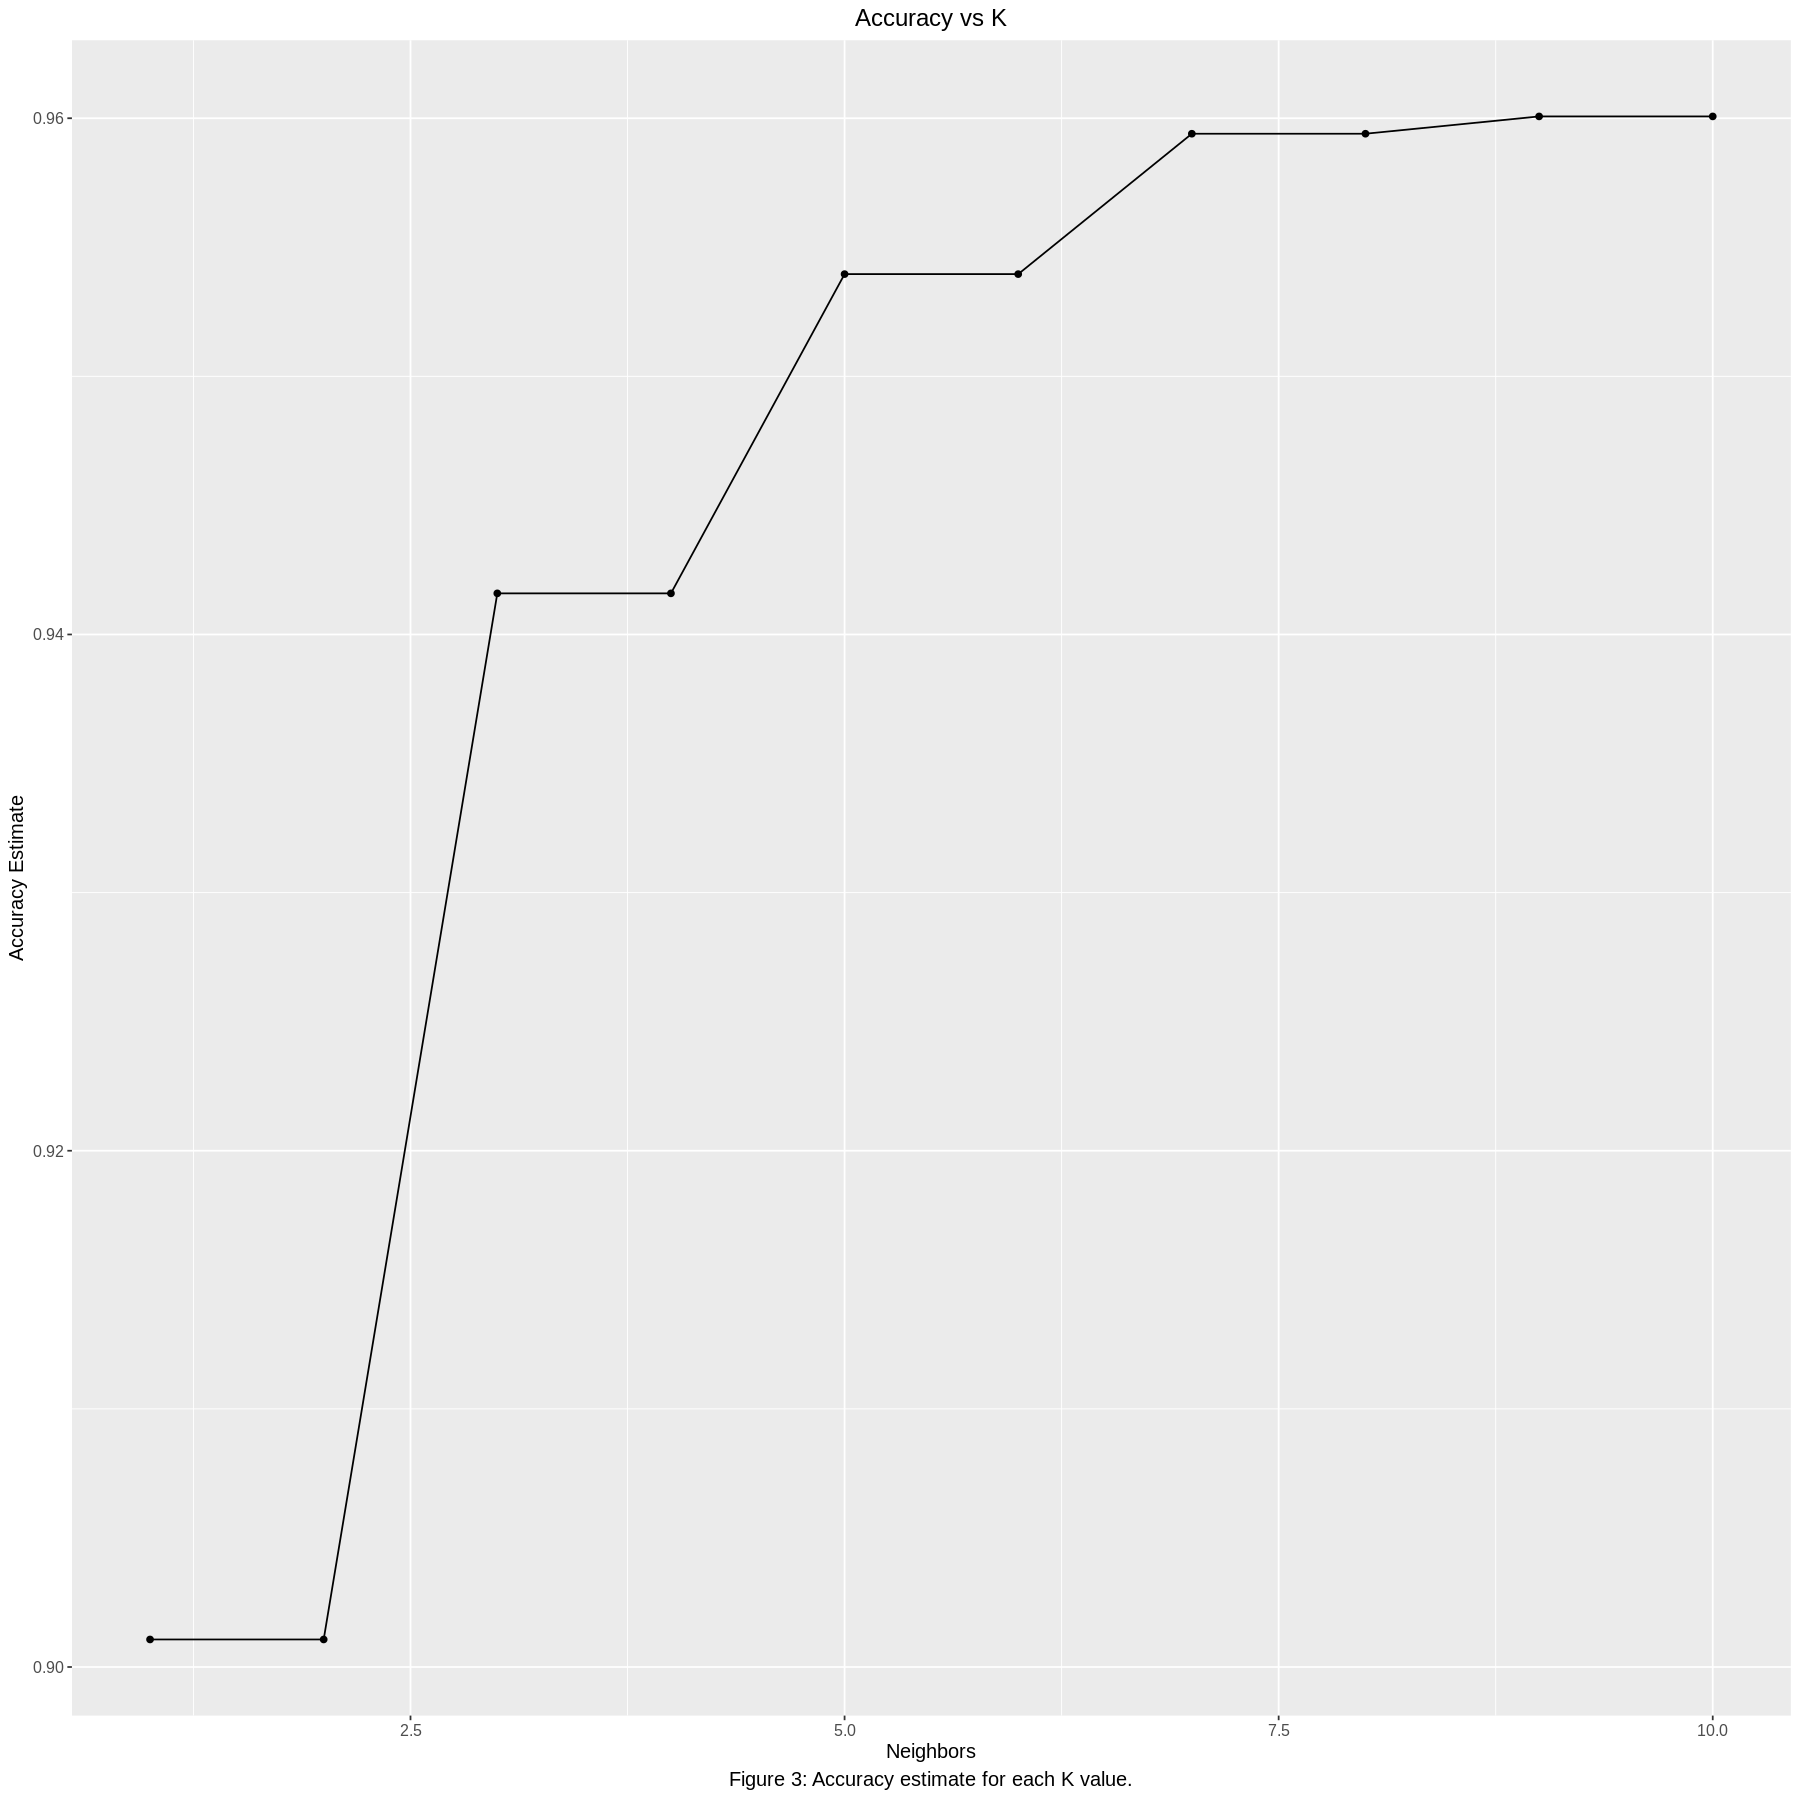

In [11]:
# WE ARE LOOKING AT K VALUES WHICH ARE BETWEEN 1-10 FOR OUR MODEL
k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

# COMBINING EVERYTHING TO PUT OUR WORKFLOW TOGETHER
pulsar_results <- workflow() |>
    add_recipe(pulsar_recipe) |> # recipe
    add_model(pulsar_spec) |> # model spec with tune()
    tune_grid(resamples = pulsar_vfold, grid = k_vals) |>
    collect_metrics()

print("Table 5: Metric results for each K value.")
pulsar_results

# GETTING THE ACCURACIES TO PLOT AN ACCURACY VS K PLOT TO DETERMINE OUR IDEAL K 
pulsar_accuracies <- pulsar_results |>
  filter(.metric == "accuracy")

print("Table 6: Accuracy results for each K value.")
pulsar_accuracies

# PLOTTING ACCURACY VS K 
accuracy_vs_k <- ggplot(pulsar_accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate", caption = "Figure 3: Accuracy estimate for each K value.") + 
  ggtitle("Accuracy vs K") +
  theme(text = element_text(size = 12),
        plot.title = element_text(hjust = 0.5),
        plot.caption = element_text(hjust = 0.5, size = 12))

accuracy_vs_k

In [12]:
# PULLING ACCURACY FOR K=8 (CHOOSEN FROM THE PLOT ABOVE)
accuracy_for_8 <- pulsar_accuracies |>
        filter(neighbors == 8)

print("Table 7: Accuracy results for K = 8.")
accuracy_for_8

[1] "Table 7: Accuracy results for K = 8."


neighbors .metric  .estimator mean     n std_err     .config              
1 8         accuracy binary     0.959399 5 0.003759576 Preprocessor1_Model08

## Predicting the Test Set Class

1. A new classification model specification in which k=8 (decided above) has been coded for. 
2. The recipe created above, pulsar_recipe, has been used in the workflow. The workflow has been fitted to the training dataset. 
3. The predict() function has been used to predict the class labels for the testing set. Using the mutate() function, a new column, Correct, has been added to this set. This column states whether the prediction is accurate (correct or incorrect) and will be used later on in the final visualization. 
4. The accuracy of this classification model is evaluated using the metrics() function and filtering the .metrics column for accuracy. The .estimate column is selected and the value of the estimated accuracy, 0.964, is pulled. This tells us that the model has an estimated accuracy of 96.4%.
5. A confusion matrix is then created to show a breakdown of the success of the prediction. It shows how many class 0 and class 1 pulsars were classified correctly and incorrectly.


In [13]:
# 1: SPEC WITH OUR CHOSEN K VALUE 
final_pulsar_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = 8) |>
  set_engine("kknn") |>
  set_mode("classification")

# 2: PUTTING OUR WORKFLOW TOGETHER WITH THE RECIPE
pulsar_final_fit <- workflow() |>
    add_recipe(pulsar_recipe) |>
    add_model(final_pulsar_spec) |>
    fit(data = pulsar_train_split)

# 3: WE ARE PREDICTING WITH PULSAR TEST SET
prediction_pulsar <- predict(pulsar_final_fit, pulsar_test_split) |>
    bind_cols(pulsar_test_split) |>
    mutate(Correct = (class == .pred_class))

print("Table 8: Testing dataset with prediction_pulsar results.")
prediction_pulsar

# 4: EVALUATION OF OUR MODEL'S ACCURACY WHEN IT PREDICTS ON OUR TEST SET
test_set_accuracy <- prediction_pulsar |>
  metrics(truth = class, estimate = .pred_class) |> 
  filter(.metric == "accuracy") |> 
  select(.estimate) |> 
  pull() 

print("Model accuracy when predicting on testing dataset.")
test_set_accuracy

# 5: CONFUSION MATRIX OF OUR MODEL
conf_mat_test <- prediction_pulsar |> 
             conf_mat(truth = class, estimate = .pred_class)

print("Model confusion matrix when predicting on testing dataset.")
conf_mat_test

[1] "Table 8: Testing dataset with prediction_pulsar results."


.pred_class mean_ip   std_ip   kurt_ip     skew_ip     mean_dm_snr
1    0           140.56250 55.68378 -0.2345714  -0.6996484  3.199833   
2    0            88.72656 40.67223  0.6008661   1.1234917  1.178930   
3    0           142.07812 45.28807 -0.3203284   0.2839525  5.376254   
⋮    ⋮           ⋮         ⋮        ⋮           ⋮           ⋮          
4473 0            90.14844 40.78604  0.45713856  0.88551621 5.3545150  
4474 0           121.37500 53.24516  0.10377221 -0.36511875 1.0953177  
4475 0           118.48438 50.60848 -0.02905883 -0.02749376 0.4222408  
     std_dm_snr kurt_dm_snr skew_dm_snr class Correct
1    19.11043    7.975532    74.24222   0     TRUE   
2    11.46872   14.269573   252.56731   0     TRUE   
3    29.00990    6.076266    37.83139   0     TRUE   
⋮    ⋮          ⋮           ⋮           ⋮     ⋮      
4473 29.759511   6.102231    37.97952   0     TRUE   
4474 12.239976  16.258042   303.88002   0     TRUE   
4475  8.086684  27.446113   830.63855   0     TRUE

[1] "Model accuracy when predicting on testing dataset."


[1] 0.9631285

[1] "Model confusion matrix when predicting on testing dataset."


          Truth
Prediction    0    1
         0 3931   37
         1  128  379

## Final Visualization of Analysis

A bar chart is chosen for visualizing the proportions of correct and incorrect predictions for both the classes. This visually shows the estimated accuracy of the model. 


`summarise()` has grouped output by 'Correct'. You can override using the
`.groups` argument.


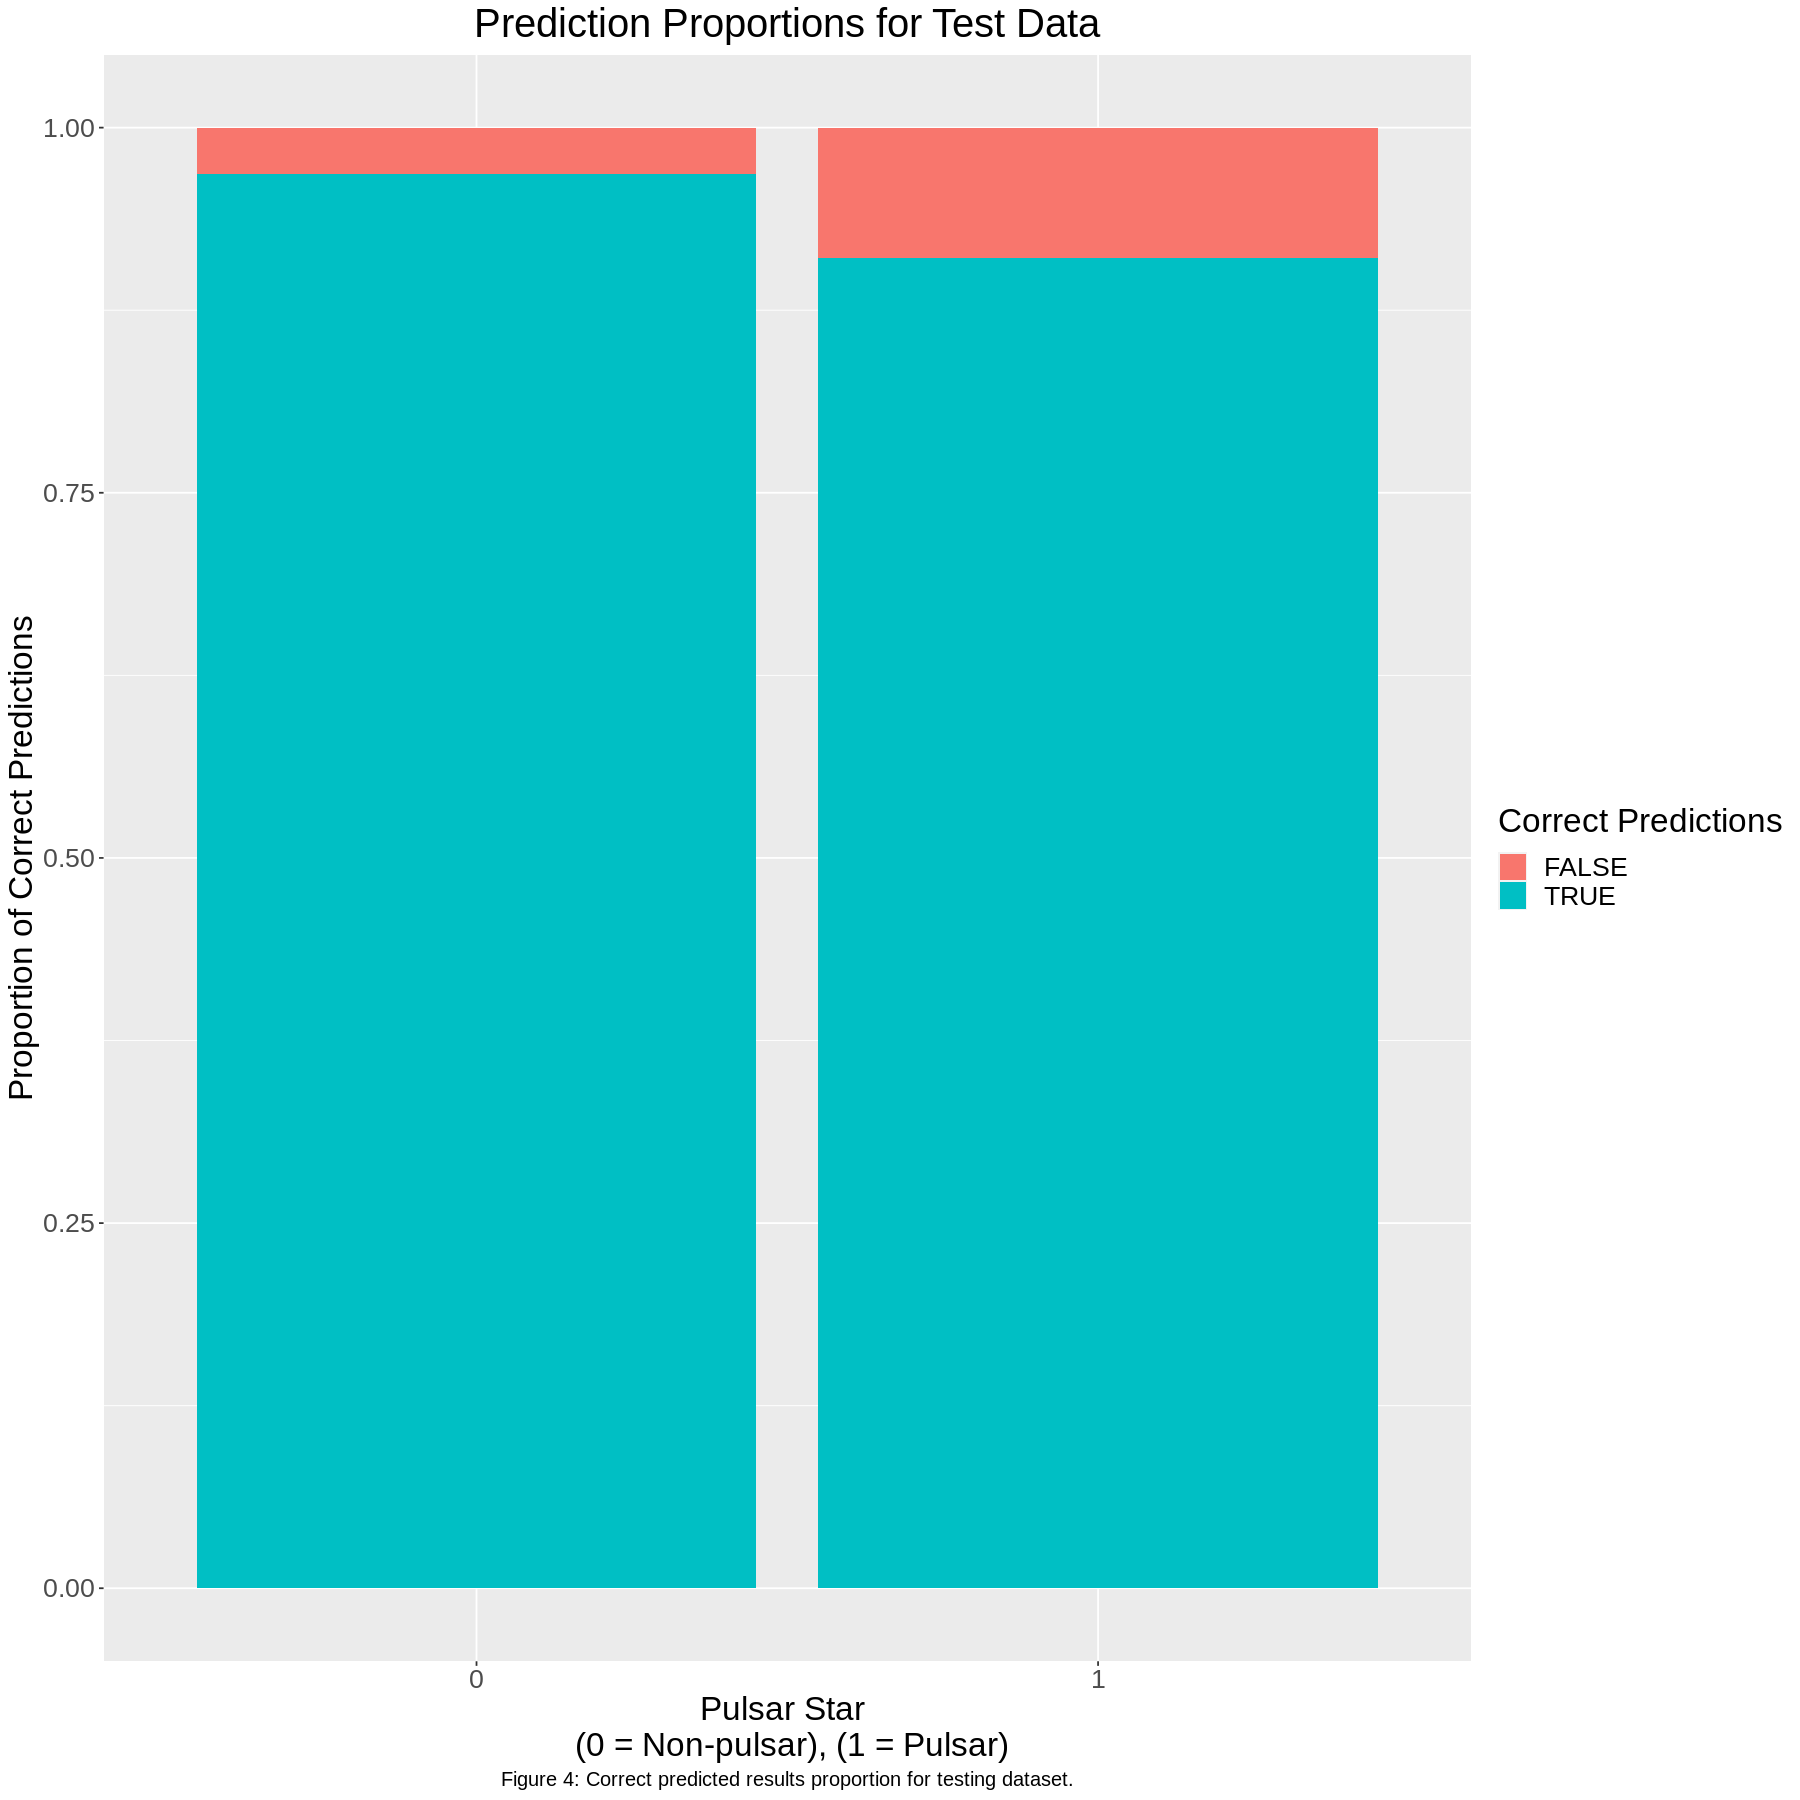

In [14]:
# LOOKING AT THE PROPORTION OF OUR PREDICTIONS ON TEST DATA THAT ARE CORRECT
pulsar_prediction_data <- prediction_pulsar |>
    mutate(Correct = as_factor(Correct)) |>
    group_by(Correct, class) |>
    summarize(count = n(), prop = count/ nrow(prediction_pulsar))

pulsar_proportions_plot <- ggplot(pulsar_prediction_data, aes(x=class, y=count, fill = as_factor(Correct)))+
    geom_bar(position = "fill", stat = "identity") + 
    labs(fill = "Correct Predictions", caption = "Figure 4: Correct predicted results proportion for testing dataset.") +
    xlab("Pulsar Star \n (0 = Non-pulsar), (1 = Pulsar)") + 
    ylab("Proportion of Correct Predictions") +
    ggtitle("Prediction Proportions for Test Data") +
    theme(text = element_text(size = 20),
          plot.title = element_text(hjust = 0.5),
          plot.caption = element_text(hjust = 0.5, size = 12))

pulsar_proportions_plot

## Visualization of Classifier’s Decision

The colour-shaded visualization is used to picture how the classifier uses the values of the two predictor variables, kurt_ip and mean_dm_snr, to predict the class of unknown data points. An unknown data point falling within the orange region is predicted to be a non-pulsar signal and an unknown data point falling within the blue region is predicted to be a true pulsar. It can be seen that the pulsar class predictions, the blue region, are spread over a much larger range of kurt_ip as compared to the non-pulsar class predictions, the orange region. 


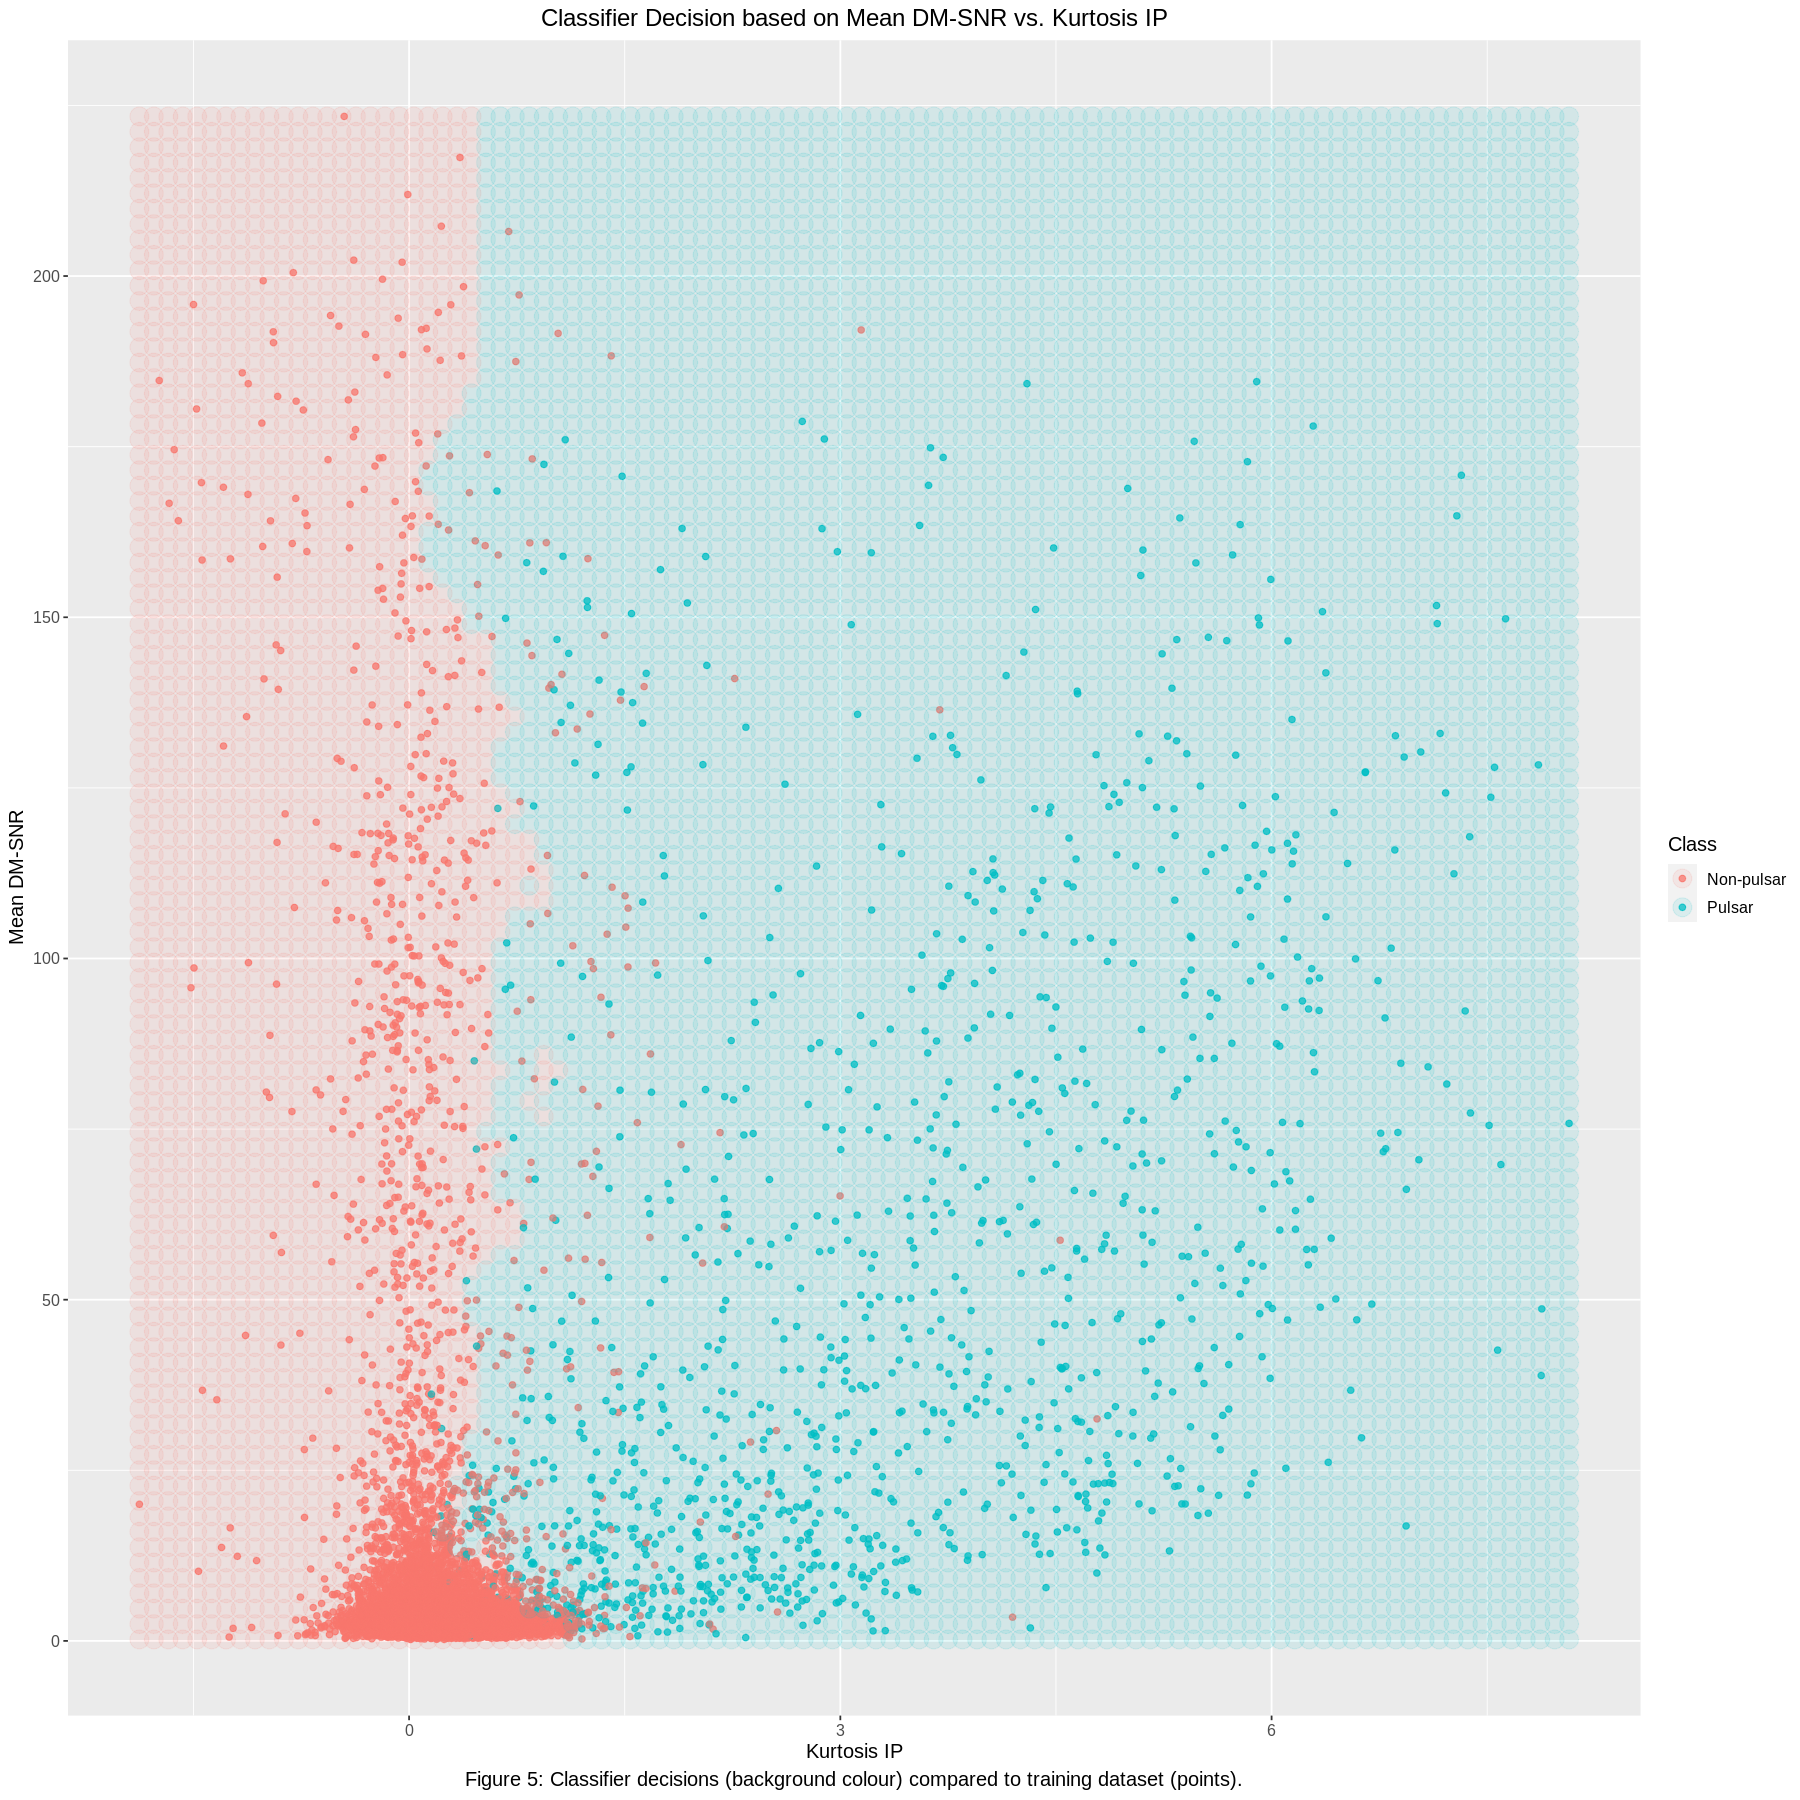

In [15]:
# FINAL VISUALIZATION OF THE ANALYSIS, LOOKING AT HOW OUR CLASSIFIER WORKS WITH PREDICTOR VARIABLES KURT_IP AND MEAN_DM_SNR
kurt_ip_grid <- seq(min(pulsar_train_split$kurt_ip), 
                max(pulsar_train_split$kurt_ip), 
                length.out = 100)

mean_dm_snr_grid <- seq(min(pulsar_train_split$mean_dm_snr), 
                max(pulsar_train_split$mean_dm_snr), 
                length.out = 100)

asgrid <- as_tibble(expand.grid(kurt_ip = kurt_ip_grid, 
                                mean_dm_snr = mean_dm_snr_grid))

pulsar_prediction <- predict(pulsar_final_fit, asgrid)

pulsar_prediction_table <- bind_cols(pulsar_prediction, asgrid) |> 
  rename(class = .pred_class)

pulsar_class_decision_plot <- ggplot() +
  geom_point(data = pulsar_train_split, 
             mapping = aes(x = kurt_ip, 
                           y = mean_dm_snr, 
                           color = class), 
             alpha = 0.75) +
  geom_point(data = pulsar_prediction_table, 
             mapping = aes(x = kurt_ip, 
                           y = mean_dm_snr, 
                           color = class), 
             alpha = 0.1, 
             size = 5) +
  labs(color = "Class", 
       x = "Kurtosis IP", 
       y = "Mean DM-SNR",
       caption = "Figure 5: Classifier decisions (background colour) compared to training dataset (points).") +
  ggtitle("Classifier Decision based on Mean DM-SNR vs. Kurtosis IP") +
  scale_color_hue(labels = c("Non-pulsar", "Pulsar")) +
  theme(text = element_text(size = 12),
        plot.title = element_text(hjust = 0.5),
        plot.caption = element_text(hjust = 0.5, size = 12))

pulsar_class_decision_plot

## Discussion

Data analysis showed that the kurtosis of the integrated pulse profile and the mean of the DM-SNR curve of the detected signal of a potential pulsar star candidate are reliable for classifying whether the detected signal is a real pulsar star. Our classification model that took kurtosis of the integrated pulse profile and mean of the DM-SNR curve into account has an estimated accuracy of 96.42% on our test dataset. Compared to the accuracy of the majority classifier of 50% (because we scaled it down to have equal proportions of each class), the estimated accuracy of the classification model is significantly higher, and the model developed in this project shows that you can clearly predict whether a signal is a pulstar or not quite accurately. Figure 4 shows the model accuracy. It has well over 75% accurate classification accuracy for both class 0 (non-pulsar) and class 1 (pulsar) signals.
 
Looking at the boxplots of the DM-SNR curves in Fig. 2, it can be seen that the majority of non-pulsar stars (class 0) have a zero mean, whereas the majority of pulsar stars (class 1) have a more spread out distribution of means that is non-zero. This finding is predictable and consistent with previous literature from the study of DM-SNR curves for pulsar stars, stating that  “a legitimate pulsar signal…will be dispersed…[and] should peak at a DM greater than zero” (Lyon, 2016). Moreover, previous literature has identified pulsar stars with extreme kurtosis distributions that are 'less pointed' and 'broader' than non-pulsar stars with “distinguishable peaks” (Amarouchous, 2018). Looking at the extreme kurtosis distribution of the integrated profile in Fig. 2, it is clear that the non-pulsar stars have a much narrower distribution than the pulsar stars, which have a relatively flat and broad distribution, and Amarouchous. corroborates the findings.
 
It is not surprising that the classifier would produce results with such high accuracy when using the excess kurtosis of the integrated profile as a predictor variable. Excess kurtosis is a statistic with “good antinoise ability” means that it may effectively and precisely aid in determining whether a signal is from a pulsar star or not by filtering out spurious signals produced by background noise that pulsar star detectors pick up on (Zhao et al., 2022). This makes it a particularly good predictor variable for a pulsar star classification model.
 
Astronomers believe that the excellent accuracy of this classification model, along with the identification of the mean of the DM-SNR curve and excess kurtosis of the integrated pulse profile as reliable prediction variables for pulsar stars, would be of great use. As stated in the introduction, pulsar stars are crucial for the investigation of the most extreme states of matter, the search for planets outside of our solar system, the determination of distances in space, and perhaps even the investigation of blackholes. The effectiveness of astronomers and scientists working with pulsar star signals can be increased by having an accurate categorization model that can swiftly filter for pulsar stars, opening up additional opportunities for discoveries about the solar system and matter.
 
Future inquiries can focus on why pulsar stars have particular statistical traits, such as why the distribution for excess kurtosis is wider for pulsar stars. In order to classify pulsar stars more accurately in the future, more researchers may be interested in researching each of the statistical traits in greater detail and attempting to establish a threshold value or range for each continuous variable observed in the HTRU2 dataset.
 
Overall, whether utilised to identify detected signals as non-pulsar or pulsar stars, our approach offers a high estimated accuracy. This experiment supports the notion that a signal's identification may be inferred from its integrated profile's DM-SNR curve, notably from its mean and excess kurtosis (as either pulsar or non-pulsar). This study shows that it is possible to identify pulsar stars using these statistical properties, which could result in more discoveries and more fruitful future astronomical and natural science research.


## References

Amarouchos. (2018, June 10). Needles in a haystack: Finding pulsars in cosmological data. Data Incognita. Retrieved December 1, 2022, from https://dataincognita.net/2018/04/23/needles-in-a-haystack-finding-pulsars-in-cosmological-data/

Lyon, R. J. (2016). Why are pulsars hard to find? Retrieved December 1, 2022, from https://www.research.manchester.ac.uk/portal/files/54588348/FULL_TEXT.PDF

Zhao, H., Jin, J., Wang, L., Shan, B., Shen, Y., & Jiang, Y. (2022, April 8). A Pulsar Search Method Combining a New Feature Representation and Convolutional Neural Network. The Astrophysical Journal. Retrieved November 30, 2022, from https://iopscience.iop.org/article/10.3847/1538-4357/ac52ef

Astronomy & Astrophysics. (2011, May 13). Retrieved December 1, 2022, from https://www.aanda.org/articles/aa/full/2006/40/aa6029-06/aa6029-06.html 

Measures of skewness and Kurtosis. (n.d.). Retrieved December 1, 2022, from https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm 
